In [1]:
import torch
import tensorflow as tf
import torchvision.models as models

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

In [36]:
torch_model = models.densenet121(pretrained=False, num_classes=100)

In [37]:
torch_model.load_state_dict(torch.load('/Users/mzvyagin/Documents/cross_framework_hpo/cross_framework_hpo/cifar100/densenet_lambda/model_weights/dual_train_32d9da9e.pt_model.pt'))

RuntimeError: Error(s) in loading state_dict for DenseNet:
	size mismatch for classifier.weight: copying a param with shape torch.Size([1000, 1024]) from checkpoint, the shape in current model is torch.Size([100, 1024]).
	size mismatch for classifier.bias: copying a param with shape torch.Size([1000]) from checkpoint, the shape in current model is torch.Size([100]).

In [35]:
torch_model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [8]:
torch_params = []
for x in model.parameters():
    torch_params.extend(x.detach().numpy().flatten())

In [9]:
len(torch_params)

7978856

In [10]:
tf_model =tf.keras.applications.densenet.DenseNet121(weights=None, input_shape=(32, 32, 3), classes=100)
tf_model.load_weights('/Users/mzvyagin/Documents/cross_framework_hpo/cross_framework_hpo/cifar100/densenet_lambda/model_weights/dual_train_32d9da9etf_model')

In [22]:
tf_model.trainable_variables[15].name

'conv2_block3_0_bn/gamma:0'

In [23]:
tf_params = []
for x in tf_model.trainable_variables:
    tf_params.extend(x.numpy().flatten())

In [26]:
for x in tf_model.trainable_variables:
    if 'conv5_block16_2_conv' in x.name:
        tf_final_conv = x.numpy()

In [28]:
tf_final_conv.shape

(3, 3, 128, 32)

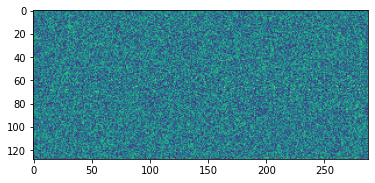

In [30]:
plt.imshow(tf_final_conv.reshape(128, -1))

<AxesSubplot:ylabel='Count'>

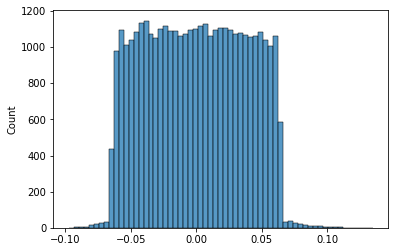

In [31]:
sns.histplot(tf_final_conv.flatten())

<AxesSubplot:ylabel='Count'>

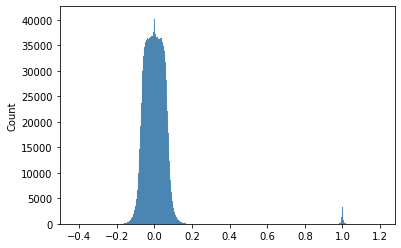

In [13]:
sns.histplot(tf_params)

<AxesSubplot:ylabel='Count'>

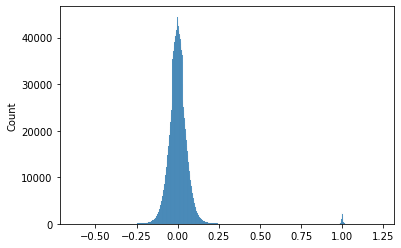

In [14]:
sns.histplot(torch_params)